# 1. Importing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import numpy as np
from IPython.display import display, HTML

CSS = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))


pd.options.display.float_format = '{:05.2f}'.format

# 2. Getting data

In [2]:
data = pd.read_csv('data/drafted_players.csv')

data = data.query('year > 2000')

data

,year,round,pick,player_name,position,age,first_team_ap,pro_bowls,team,av,first_4_years_av
0,2020,1,1,Joe Burrow,QB,23.00,0,0,CIN,7,7
1,2020,1,2,Chase Young,DE,21.00,0,1,WAS,14,14
2,2020,1,3,Jeff Okudah,CB,21.00,0,0,DET,2,2
3,2020,1,4,Andrew Thomas,T,21.00,0,0,NYG,6,6
4,2020,1,5,Tua Tagovailoa,QB,22.00,0,0,MIA,5,5
...,...,...,...,...,...,...,...,...,...,...,...
5091,2001,7,242,Char-ron Dorsey,T,23.00,0,0,DAL,0,0
5092,2001,7,243,Terdell Sands,DT,21.00,0,0,KAN,11,2
5093,2001,7,244,Robert Carswell,DB,22.00,0,0,SDG,0,0
5094,2001,7,245,Andre King,WR,27.00,0,0,CLE,2,2


In [3]:
data.query('av > 1').query("position == 'OL'")

,year,round,pick,player_name,position,age,first_team_ap,pro_bowls,team,av,first_4_years_av
1569,2014,2,43,Weston Richburg,OL,23.00,0,0,NYG,32,22
1592,2014,3,66,Morgan Moses,OL,23.00,0,0,WAS,44,29
1618,2014,3,92,Trai Turner,OL,21.00,0,5,CAR,45,32
1619,2014,3,93,Brandon Linder,OL,22.00,0,0,JAX,30,20
1621,2014,3,95,Michael Schofield,OL,23.00,0,0,DEN,31,16
1663,2014,4,137,Dakota Dozier,OL,23.00,0,0,NYJ,14,2
1699,2014,5,173,Wesley Johnson,OL,23.00,0,0,PIT,12,11
1705,2014,6,179,Jon Halapio,OL,23.00,0,0,NWE,10,2
1726,2014,6,200,Laurent Duvernay-Tardif,OL,23.00,0,0,KAN,27,20
1733,2014,6,207,Matt Paradis,OL,24.00,0,0,DEN,33,19


In [4]:
data.query('av > 1').query("position == 'DL'")

,year,round,pick,player_name,position,age,first_team_ap,pro_bowls,team,av,first_4_years_av
984,2017,7,220,Ifeadi Odenigbo,DL,23.00,0,0,MIN,9,9


In [5]:
pd.set_option('display.max_rows', None)

data.query('av > 1').query("position == 'DB'")

,year,round,pick,player_name,position,age,first_team_ap,pro_bowls,team,av,first_4_years_av
854,2017,3,90,Shaquill Griffin,DB,22.00,0,1,SEA,23,24
950,2017,6,186,Chuck Clark,DB,22.00,0,0,BAL,13,14
993,2017,7,229,Adrian Colbert,DB,23.00,0,0,SFO,6,6
1519,2015,7,249,Akeem King,DB,23.00,0,0,ATL,3,1
1534,2014,1,8,Justin Gilbert,DB,22.00,0,0,CLE,3,3
1540,2014,1,14,Kyle Fuller,DB,22.00,1,2,CHI,44,17
1544,2014,1,18,Calvin Pryor,DB,22.00,0,0,NYJ,17,18
1547,2014,1,21,Ha Ha Clinton-Dix,DB,21.00,0,1,GNB,35,25
1550,2014,1,24,Darqueze Dennard,DB,22.00,0,0,CIN,12,6
1551,2014,1,25,Jason Verrett,DB,23.00,0,1,SDG,15,10


In [6]:
data.position.replace('C', 'iOL', inplace=True)
data.position.replace('G', 'iOL', inplace=True)
data.position.replace('OL', 'iOL', inplace=True)
data.position.replace('T', 'OT', inplace=True)

data.position.replace('DL', 'DE', inplace=True)

data.position.replace('NT', 'DT', inplace=True)

data.position.replace('OLB', 'LB', inplace=True)
data.position.replace('ILB', 'LB', inplace=True)

data.position.replace('CB', 'DB', inplace=True)
data.position.replace('S', 'DB', inplace=True)

data.position.replace('K', 'ST', inplace=True)
data.position.replace('P', 'ST', inplace=True)
data.position.replace('LS', 'ST', inplace=True)

positions = ['QB', 'WR', 'RB', 'TE', 'OT', 'iOL', 'DT', 'DE', 'LB', 'DB']

# 3. Plotting data

<AxesSubplot:xlabel='age', ylabel='av'>

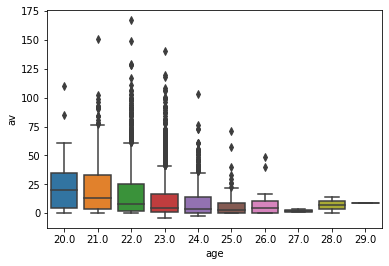

In [7]:
sns.boxplot(x="age", y="av", data=data)

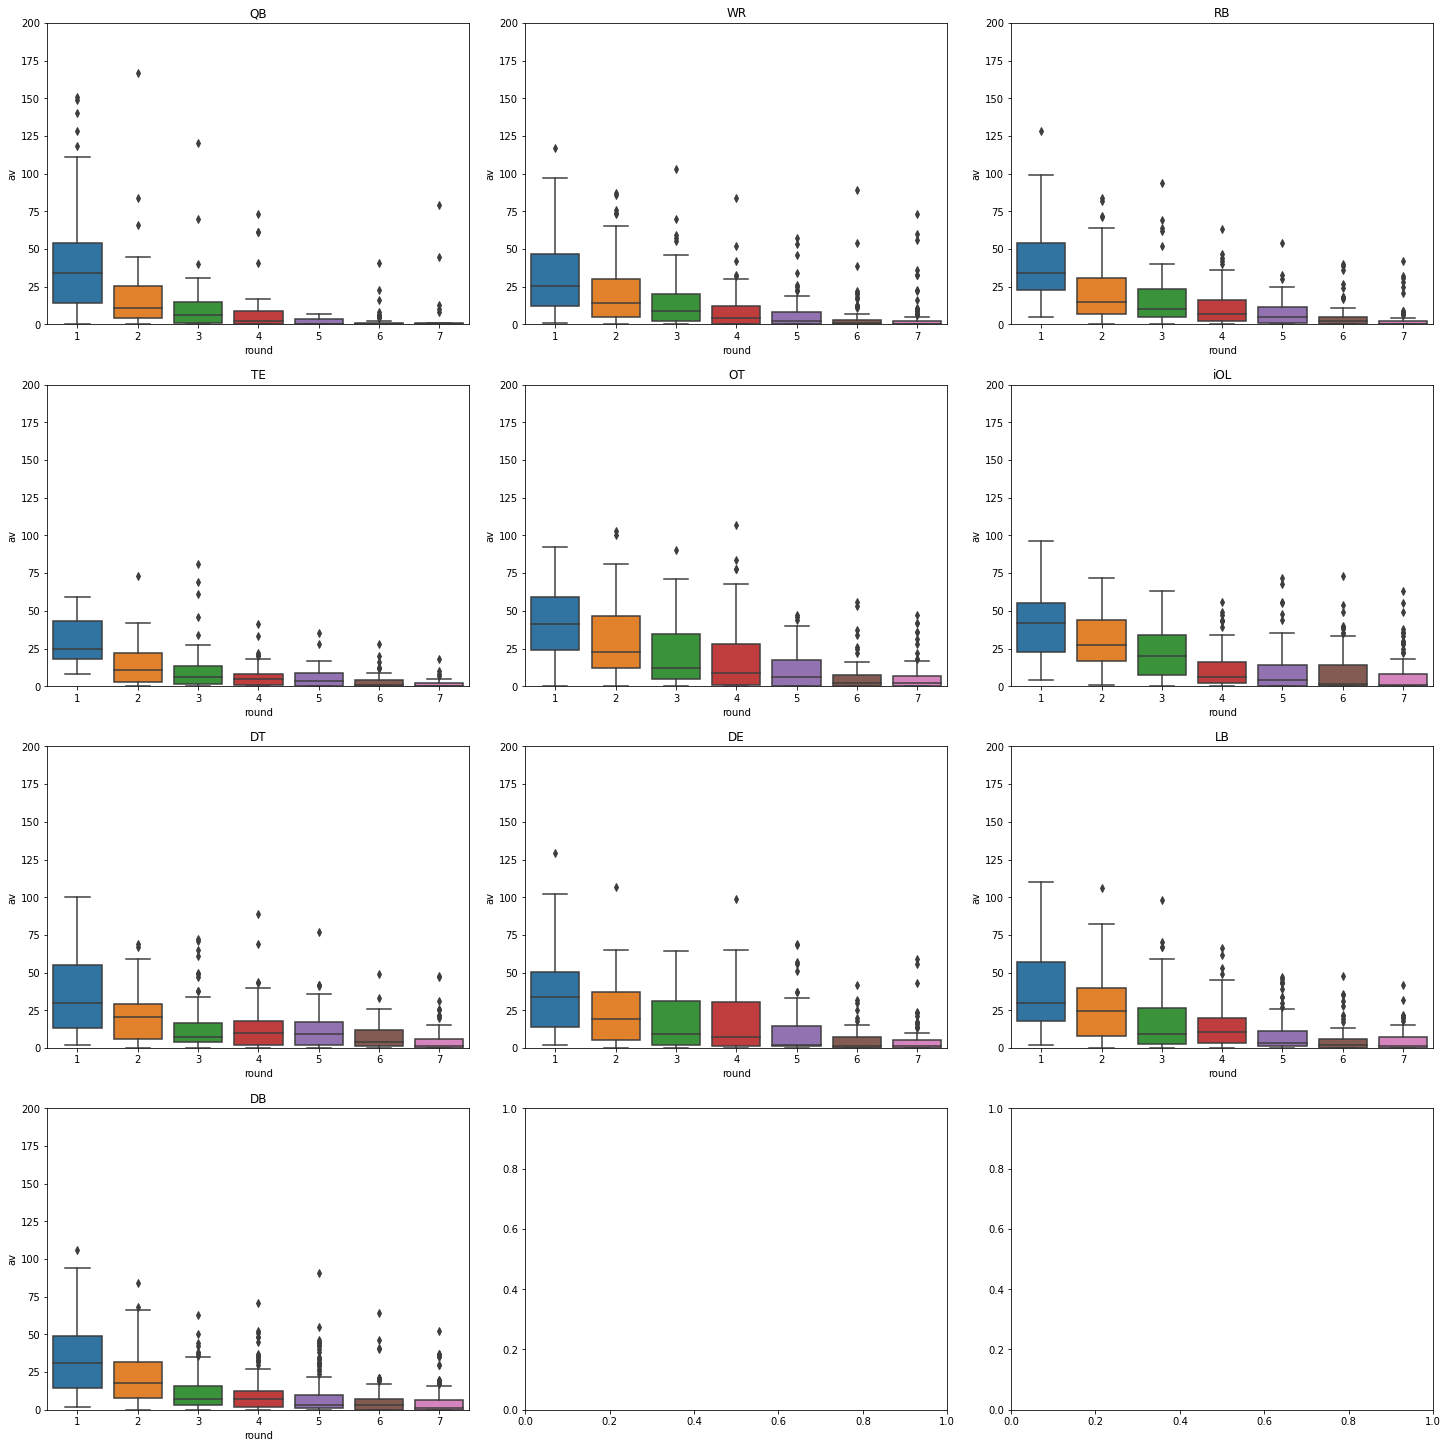

In [8]:
def box_plot_round_by_position(positions):
    w = 3
    h = len(positions) / w
    if len(positions) % w != 0:
        h += 1
    h = int(h)
    fig, axs = plt.subplots(h, w, figsize=(20,20), constrained_layout=True)

    for i, position in enumerate(positions):
        x = int(i / 3)
        y = i % 3

        position_data = data.loc[data['position'] == position]
        ax = axs[x][y]
        ax.set_ylim([0, 200])
        ax.set_xlim([0, 7])

        sns.boxplot(x="round", y="av", data=position_data, ax=ax).set_title(position)

    plt.show()
    
box_plot_round_by_position(positions)

In [9]:
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        try:
            df_str = df.to_html()
        except:
            df_str = df.render()

        html_str+=df_str.replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)


In [15]:
def background_gradient(s, m=None, M=None, cmap='PuBu', low=0, high=0):
    if m is None:
        m = s.min().min()
    if M is None:
        M = s.max().max()
    rng = M - m
    norm = colors.Normalize(m - (rng * low),
                            M + (rng * high))
    normed = s.apply(norm)

    cm = plt.cm.get_cmap(cmap)
    c = normed.applymap(lambda x: colors.rgb2hex(cm(x)))
    ret = c.applymap(lambda x: 'background-color: %s' % x)
    return ret


def get_percentiles(data, percentiles):
    ret = []
    for p in percentiles:
        ret.append(round(np.percentile(data, int(p)), 2))

    return ret

def print_percentiles(positions):
    for position in positions:
        print(position)
        position_data = data.loc[data['position'] == position]

        percentiles = ['90', '75', '50', '25']

        rounds = {}
        for rnd in range(1,8):
            rounds[rnd] = []
            avs = position_data.loc[data['round'] == rnd].av
            rounds[rnd] = get_percentiles(avs, percentiles)
        
        overall = {}
        overall['overall'] = get_percentiles(position_data.av, percentiles)
        overall['non-zero av'] = get_percentiles(position_data.query("av != 0").av, percentiles)


        df = pd.DataFrame(data=rounds)
        ovr_df = pd.DataFrame(data=overall)

        for i in range(len(percentiles)):
            df = df.rename({i: percentiles[i] + 'th'}, axis='index')
            ovr_df = ovr_df.rename({i: percentiles[i] + 'th'}, axis='index')
        
        df = df.style.apply(background_gradient, axis=None)
#         ovr_df = ovr_df.style.apply(background_gradient, axis=None)

        display_side_by_side(df, ovr_df, titles=['By round', 'Overall'])
        
print_percentiles(positions)

QB


By round 1 2 3 4 5 6 7 
 
 90th 
 108.600000 
 63.900000 
 37.300000 
 43.000000 
 6.000000 
 6.000000 
 8.600000 
 
 
 75th 
 54.000000 
 25.500000 
 14.750000 
 8.750000 
 3.500000 
 1.000000 
 0.750000 
 
 
 50th 
 34.000000 
 11.000000 
 6.000000 
 2.000000 
 0.000000 
 0.000000 
 0.000000 
 
 
 25th 
 14.500000 
 4.000000 
 1.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 
 Overall 
 
 
 
 overall 
 non-zero av 
 
 
 
 
 90th 
 52.60 
 76.00 
 
 
 75th 
 17.00 
 38.00 
 
 
 50th 
 03.00 
 12.00 
 
 
 25th 
 00.00 
 04.00

WR


By round 1 2 3 4 5 6 7 
 
 90th 
 69.300000 
 56.700000 
 43.400000 
 24.000000 
 18.600000 
 12.000000 
 10.000000 
 
 
 75th 
 46.500000 
 30.000000 
 20.000000 
 12.000000 
 8.000000 
 3.000000 
 2.000000 
 
 
 50th 
 25.500000 
 14.000000 
 9.000000 
 4.000000 
 2.000000 
 1.000000 
 0.000000 
 
 
 25th 
 12.000000 
 5.000000 
 2.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 
 Overall 
 
 
 
 overall 
 non-zero av 
 
 
 
 
 90th 
 39.00 
 49.00 
 
 
 75th 
 17.00 
 23.00 
 
 
 50th 
 04.00 
 09.00 
 
 
 25th 
 00.00 
 03.00

RB


By round 1 2 3 4 5 6 7 
 
 90th 
 68.600000 
 58.200000 
 40.000000 
 30.800000 
 24.000000 
 18.000000 
 8.300000 
 
 
 75th 
 54.000000 
 31.000000 
 23.500000 
 16.000000 
 11.500000 
 5.000000 
 2.000000 
 
 
 50th 
 34.000000 
 15.000000 
 10.000000 
 7.000000 
 5.000000 
 2.000000 
 0.000000 
 
 
 25th 
 22.500000 
 7.000000 
 5.000000 
 2.000000 
 1.000000 
 0.000000 
 0.000000 
 
 Overall 
 
 
 
 overall 
 non-zero av 
 
 
 
 
 90th 
 39.60 
 43.00 
 
 
 75th 
 21.00 
 26.50 
 
 
 50th 
 06.00 
 10.00 
 
 
 25th 
 01.00 
 04.00

TE


By round 1 2 3 4 5 6 7 
 
 90th 
 50.700000 
 34.600000 
 29.100000 
 19.400000 
 13.500000 
 12.000000 
 4.000000 
 
 
 75th 
 43.000000 
 22.000000 
 13.250000 
 8.000000 
 8.750000 
 4.000000 
 2.000000 
 
 
 50th 
 24.500000 
 11.000000 
 6.000000 
 5.000000 
 3.500000 
 1.000000 
 0.000000 
 
 
 25th 
 18.000000 
 3.000000 
 1.750000 
 1.000000 
 0.000000 
 0.000000 
 0.000000 
 
 Overall 
 
 
 
 overall 
 non-zero av 
 
 
 
 
 90th 
 24.40 
 33.60 
 
 
 75th 
 11.00 
 16.00 
 
 
 50th 
 03.00 
 08.00 
 
 
 25th 
 00.00 
 03.00

OT


By round 1 2 3 4 5 6 7 
 
 90th 
 71.800000 
 57.300000 
 47.800000 
 62.400000 
 39.000000 
 22.600000 
 29.200000 
 
 
 75th 
 59.000000 
 46.250000 
 34.500000 
 28.000000 
 17.500000 
 7.500000 
 7.000000 
 
 
 50th 
 41.000000 
 22.500000 
 12.000000 
 8.500000 
 6.000000 
 2.000000 
 2.000000 
 
 
 25th 
 24.000000 
 12.250000 
 5.000000 
 1.000000 
 0.000000 
 0.000000 
 0.000000 
 
 Overall 
 
 
 
 overall 
 non-zero av 
 
 
 
 
 90th 
 54.00 
 59.70 
 
 
 75th 
 36.00 
 41.75 
 
 
 50th 
 11.00 
 18.00 
 
 
 25th 
 02.00 
 06.00

iOL


By round 1 2 3 4 5 6 7 
 
 90th 
 74.800000 
 59.000000 
 45.100000 
 31.600000 
 35.000000 
 35.000000 
 28.400000 
 
 
 75th 
 55.000000 
 43.750000 
 34.250000 
 16.000000 
 14.000000 
 13.750000 
 8.000000 
 
 
 50th 
 42.000000 
 27.000000 
 20.000000 
 6.000000 
 4.000000 
 1.500000 
 1.000000 
 
 
 25th 
 22.500000 
 17.000000 
 7.750000 
 2.000000 
 0.000000 
 0.000000 
 0.000000 
 
 Overall 
 
 
 
 overall 
 non-zero av 
 
 
 
 
 90th 
 45.00 
 49.00 
 
 
 75th 
 28.00 
 34.00 
 
 
 50th 
 08.00 
 15.00 
 
 
 25th 
 01.00 
 05.00

DT


By round 1 2 3 4 5 6 7 
 
 90th 
 71.800000 
 44.800000 
 38.900000 
 38.100000 
 35.300000 
 17.000000 
 20.000000 
 
 
 75th 
 55.000000 
 29.250000 
 16.250000 
 17.750000 
 17.000000 
 12.000000 
 6.000000 
 
 
 50th 
 30.000000 
 20.500000 
 7.000000 
 10.000000 
 9.500000 
 4.000000 
 1.000000 
 
 
 25th 
 13.000000 
 6.000000 
 4.000000 
 2.000000 
 1.750000 
 1.000000 
 0.000000 
 
 Overall 
 
 
 
 overall 
 non-zero av 
 
 
 
 
 90th 
 43.80 
 48.00 
 
 
 75th 
 22.00 
 26.00 
 
 
 50th 
 08.00 
 12.00 
 
 
 25th 
 02.00 
 04.00

DE


By round 1 2 3 4 5 6 7 
 
 90th 
 76.000000 
 54.000000 
 42.400000 
 46.000000 
 37.000000 
 17.400000 
 15.200000 
 
 
 75th 
 50.250000 
 37.000000 
 31.000000 
 30.500000 
 14.500000 
 7.000000 
 5.000000 
 
 
 50th 
 33.500000 
 19.000000 
 9.000000 
 7.500000 
 2.000000 
 1.000000 
 1.000000 
 
 
 25th 
 13.750000 
 5.000000 
 2.000000 
 1.250000 
 1.000000 
 0.000000 
 0.000000 
 
 Overall 
 
 
 
 overall 
 non-zero av 
 
 
 
 
 90th 
 50.00 
 54.00 
 
 
 75th 
 27.75 
 33.50 
 
 
 50th 
 07.00 
 13.00 
 
 
 25th 
 01.00 
 03.00

LB


By round 1 2 3 4 5 6 7 
 
 90th 
 81.600000 
 56.300000 
 40.300000 
 34.800000 
 25.500000 
 12.900000 
 12.000000 
 
 
 75th 
 57.000000 
 40.000000 
 26.500000 
 20.000000 
 11.000000 
 6.000000 
 7.000000 
 
 
 50th 
 30.000000 
 24.500000 
 9.000000 
 10.500000 
 3.000000 
 2.000000 
 1.000000 
 
 
 25th 
 18.000000 
 7.750000 
 2.750000 
 3.000000 
 1.000000 
 0.000000 
 0.000000 
 
 Overall 
 
 
 
 overall 
 non-zero av 
 
 
 
 
 90th 
 42.00 
 46.90 
 
 
 75th 
 22.00 
 26.00 
 
 
 50th 
 07.00 
 10.00 
 
 
 25th 
 01.75 
 03.00

DB


By round 1 2 3 4 5 6 7 
 
 90th 
 65.000000 
 40.800000 
 29.000000 
 26.000000 
 30.600000 
 15.000000 
 14.000000 
 
 
 75th 
 49.250000 
 31.500000 
 16.000000 
 12.500000 
 10.000000 
 7.000000 
 6.750000 
 
 
 50th 
 31.000000 
 18.000000 
 7.000000 
 7.000000 
 3.000000 
 3.000000 
 1.000000 
 
 
 25th 
 14.750000 
 8.000000 
 3.000000 
 2.000000 
 1.000000 
 0.000000 
 0.000000 
 
 Overall 
 
 
 
 overall 
 non-zero av 
 
 
 
 
 90th 
 36.00 
 38.00 
 
 
 75th 
 18.00 
 21.00 
 
 
 50th 
 06.00 
 09.00 
 
 
 25th 
 01.00 
 03.00